In [1]:
library(reshape2)
library(ggpubr)
library(rstatix)
library(dplyr)


Loading required package: ggplot2

Loading required package: magrittr


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# glycan-level

In [36]:
gly = read.csv('data//adamsczy2018_glycan_abundance.csv')
head(gly)

,m.z..M.H..,RT..min.,Composition,Structure,Core,Epitope,HexNAc,Hexose,Fucose,Neu5Ac,⋯,N.2,X..3,SEM.3,N.3,X..4,SEM.4,N.4,X..5,SEM.5,N.5
,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,425.21,12.63,HexNAc2,"GlcNAcβ1,3GalNAcol",3,,2,NA,NA,NA,⋯,6,0.195,0.056,6,0.163,0.057,12,0.157,0.033,12
2,513.26,8.01,NeuAc1HexNAc1,"NeuAcα2,6GalNAcol",NA,sTn,1,NA,NA,1,⋯,6,0.717,0.078,6,1.801,0.520,12,1.107,0.286,12
3,530.47,22.60,Hex1HexNAc1dHex1,"Fucα1,2Galβ1,3GalNAcol",1,H,1,1,1,NA,⋯,6,4.515,1.115,6,4.957,0.693,12,3.815,0.707,12
4,587.25,10.84,Hex1HexNAc2,"Galβ1,3(GlcNAcβ1,6)GalNAcol",2,,2,1,NA,NA,⋯,6,2.164,0.649,6,2.248,0.345,12,2.526,0.422,12
5,587.28,12.63,Hex1HexNAc2,"GlcNAcα1,4Galβ1,3GalNAcol",1,αGlcNAc,2,1,NA,NA,⋯,6,2.357,0.629,6,2.703,0.670,12,2.165,0.346,12
6,675.29,9.83,NeuAc1Hex1HexNAc1,"Galβ1,3(NeuAcα2,6)GalNAcol",1,,1,1,NA,1,⋯,6,3.131,1.440,6,1.404,0.193,12,3.353,0.933,12


In [37]:
gly_data = as.data.frame(t(gly[,(13:(24+12))]))
colnames(gly_data) = gly$Structure
gly_data$type = unlist(ifelse(grepl('X[1-6]A|X[1-6]C',rownames(gly_data)),'Normal','Cancer'))
gly_data$type2 = unlist(ifelse(grepl('X[1-6]A|X[1-6]B',rownames(gly_data)),'STD','HEAT'))
gly_data$type3 = paste(gly_data$type,gly_data$type2,sep='_')
head(gly_data<-melt(gly_data))

Using type, type2, type3 as id variables



,type,type2,type3,variable,value
,<chr>,<chr>,<chr>,<fct>,<dbl>
1,Normal,STD,Normal_STD,"GlcNAcβ1,3GalNAcol",-0.646
2,Normal,STD,Normal_STD,"GlcNAcβ1,3GalNAcol",-0.806
3,Normal,STD,Normal_STD,"GlcNAcβ1,3GalNAcol",-0.747
4,Normal,STD,Normal_STD,"GlcNAcβ1,3GalNAcol",-0.647
5,Normal,STD,Normal_STD,"GlcNAcβ1,3GalNAcol",-0.440
6,Normal,STD,Normal_STD,"GlcNAcβ1,3GalNAcol",-0.789


In [38]:
rm_gly = gly_data %>% group_by(type,type2,variable) %>% summarize(sd=sd(value)) %>% filter(sd<.01)
rm_gly

`summarise()` has grouped output by 'type', 'type2'. You can override using the `.groups` argument.



type,type2,variable,sd
<chr>,<chr>,<fct>,<dbl>


In [39]:

stat.test <- gly_data %>% filter( !variable %in% rm_gly$variable) %>%
    group_by(type2,variable) %>%
    t_test(value ~ type) %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj") %>% arrange(p)

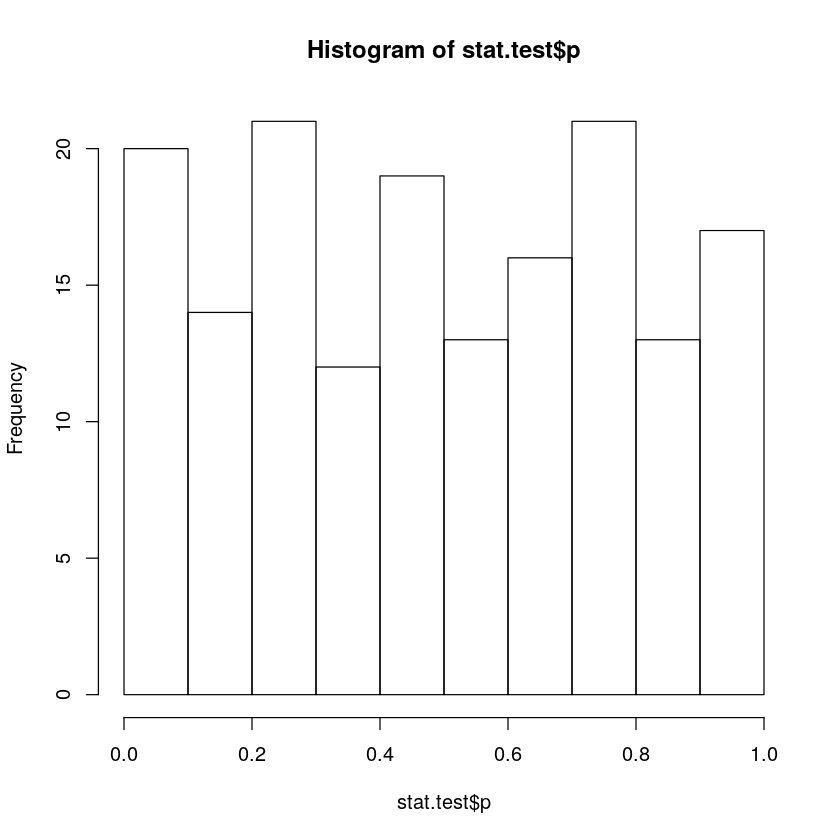

In [40]:
hist(stat.test$p)

In [29]:
stat.test
stat.test$variable[stat.test$p.adj<.1]

type2,variable,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
<chr>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
HEAT,"Gal-(Fuc-)GlcNAcβ1,3(GlcNAcα1,4Gal-GlcNAcβ1,6)Galβ1,3(GlcNAcα1,4Gal-GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,-4.009179,7.203483,0.00484,0.80344,ns
STD,"Gal-(Fuc-)GlcNAcβ1,3(Gal-(Fuc-)GlcNAcβ1,6)Galβ1,3(Gal-(Fuc-)GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,-3.734915,6.320011,0.00880,1.00000,ns
HEAT,"Fucα1,2Gal-GlcNAc-Galβ1,3(Fucα1,2Gal-GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,-2.770188,8.271001,0.02350,1.00000,ns
STD,"Gal-(Fuc-)GlcNAc(Fucα1,2)Galβ1,3(Fucα1,2Gal-(Fuc-)GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,2.914741,5.639592,0.02880,1.00000,ns
HEAT,"NeuAcα2,3Galβ1,3(GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,2.592567,6.161748,0.04010,1.00000,ns
STD,"Gal-(Fuc-)GlcNAcβ1,3Galβ1,3(Gal-(Fuc-)GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,-2.430337,8.239401,0.04030,1.00000,ns
STD,"Fucα1,2Galβ1,3(GalNAcβ1,4GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,-2.342673,9.900980,0.04140,1.00000,ns
HEAT,"Gal-GlcNAc-Galβ1,3(Fucα1,2Galβ1,4GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,-2.319881,9.263431,0.04470,1.00000,ns
STD,"Fucα1,2Gal-GlcNAc-Galβ1,3(Fucα1,2Gal-GlcNAcβ1,6)GalNAcol",value,Cancer,Normal,6,6,-2.264707,9.113398,0.04940,1.00000,ns


factor(0)
83 Levels: GlcNAcβ1,3GalNAcol NeuAcα2,6GalNAcol ... Gal-(Fuc-)GlcNAcβ1,3(Fucα1,2Gal-GlcNAcβ1,6)Galβ1,3[NeuAc-Gal-GlcNAcβ1,6]GalNAcol

# motif-level analysis

In [59]:
motifs = read.csv('data/Adamczyk_2018_motif_abd_table_linkage_integer_0307.csv',row.names = 1)


motifs = as.data.frame(t(motifs))
motifs$type = unlist(ifelse(grepl('X[1-6]A|X[1-6]C',rownames(motifs)),'Normal','Cancer'))
motifs$type2 = unlist(ifelse(grepl('X[1-6]A|X[1-6]B',rownames(motifs)),'STD','HEAT'))
motifs$type3 = paste(motifs$type,motifs$type2,sep='_')
head(motifs)
head(motifs<-melt(motifs))

,b-D-GalxS-(1-3)-?-D-Galx2NAc,b-D-Glcx2NAc-(1-6)-?-D-Galx2NAc,a-D-Neux5Ac-(2-6)-?-D-Galx2NAc,b-D-Galx-(1-3)-?-D-Galx2NAc,b-D-Glcx2NAc-(1-3)-?-D-Galx2NAc,?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-?-D-Galx2NAc,?-L-Fucx-(1-?)-b-D-Glcx2NAc-(1-6)-?-D-Galx2NAc,a-D-Neux5Ac-(2-3)-b-D-Galx-(1-3)-?-D-Galx2NAc,a-D-Neux5Ac-(2-6)-[b-D-Galx-(1-3)]?-D-Galx2NAc,b-D-Glcx2NAc-(1-6)-[b-D-Galx-(1-3)]?-D-Galx2NAc,⋯,a-D-Glcx2NAc-(1-4)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[a-D-Glcx2NAc-(1-4)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[?-L-Fucx-(1-?)-b-D-Glcx2NAc-(1-3)]b-D-Galx-(1-3)]?-D-Galx2NAc,?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[a-L-Fucx-(1-2)-b-D-Galx-(1-4)-b-D-Glcx2NAc-(1-6)-[a-L-Fucx-(1-2)-b-D-Galx-(1-4)-b-D-Glcx2NAc-(1-3)]b-D-Galx-(1-3)]?-D-Galx2NAc,?-L-Fucx-(1-?)-b-D-Glcx2NAc-(1-6)-[a-L-Fucx-(1-2)-b-D-Galx-(1-4)-b-D-Glcx2NAc-(1-6)-[a-L-Fucx-(1-2)-b-D-Galx-(1-4)-b-D-Glcx2NAc-(1-3)]b-D-Galx-(1-3)]?-D-Galx2NAc,a-L-Fucx-(1-2)-?-D-Galx-(1-?)-?-D-Glcx2NAc-(1-?)-?-D-Galx-(1-?)-?-D-Glcx2NAc-(1-?)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[a-L-Fucx-(1-2)-a-D-Galx-(1-3)]?-D-Galx2NAc,a-L-Fucx-(1-2)-?-D-Galx-(1-?)-?-D-Glcx2NAc-(1-?)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[a-L-Fucx-(1-2)-[?-D-Galx-(1-?)-?-D-Glcx2NAc-(1-?)]a-D-Galx-(1-3)]?-D-Galx2NAc,?-L-Fucx-(1-?)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[?-L-Fucx-(1-?)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-3)]b-D-Galx-(1-3)]?-D-Galx2NAc,?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[?-L-Fucx-(1-?)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[?-L-Fucx-(1-?)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-3)]b-D-Galx-(1-3)]?-D-Galx2NAc,type,type2,type3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
X1A,1.3966985,60.15210,5.414445,68.60046,2.773949,20.72897,11.455349,6.761666,3.328691,58.34947,⋯,1.1905907,1.097002,1.097002,0.7891405,0.5174236,0.6256409,0.8841273,Normal,STD,Normal_STD
X2A,1.5331200,45.70064,3.536133,52.63623,3.094868,15.96304,7.809977,4.781558,2.289044,43.12150,⋯,0.8187879,1.302281,1.302281,1.2169389,0.8674418,0.6479643,0.5225695,Normal,STD,Normal_STD
X3A,1.2609407,52.95039,3.817377,60.80681,2.569163,17.83811,9.905442,4.620794,2.687902,51.29521,⋯,0.9991531,1.696086,1.696086,0.4938669,0.6637613,0.9083446,0.4992958,Normal,STD,Normal_STD
X4A,0.7377003,45.10665,4.743080,53.50477,3.740453,15.54390,8.043626,5.737999,2.763768,42.99361,⋯,0.6776335,1.559141,1.559141,0.7586448,0.9206299,0.7935080,0.4107883,Normal,STD,Normal_STD
X5A,0.7616180,53.50149,7.778529,63.28104,3.019497,18.13771,9.386560,7.599703,3.747718,52.27051,⋯,1.1752727,1.292193,1.292193,0.3563935,0.4195460,0.9638347,0.5807229,Normal,STD,Normal_STD
X6A,0.7561056,52.45792,5.793917,60.65532,2.706812,17.85198,8.504031,6.544104,3.474192,49.97365,⋯,1.0145715,1.299647,1.299647,1.0999021,0.9837421,1.0057679,0.5345114,Normal,STD,Normal_STD


Using type, type2, type3 as id variables



,type,type2,type3,variable,value
,<chr>,<chr>,<chr>,<fct>,<dbl>
1,Normal,STD,Normal_STD,b-D-GalxS-(1-3)-?-D-Galx2NAc,1.3966985
2,Normal,STD,Normal_STD,b-D-GalxS-(1-3)-?-D-Galx2NAc,1.5331200
3,Normal,STD,Normal_STD,b-D-GalxS-(1-3)-?-D-Galx2NAc,1.2609407
4,Normal,STD,Normal_STD,b-D-GalxS-(1-3)-?-D-Galx2NAc,0.7377003
5,Normal,STD,Normal_STD,b-D-GalxS-(1-3)-?-D-Galx2NAc,0.7616180
6,Normal,STD,Normal_STD,b-D-GalxS-(1-3)-?-D-Galx2NAc,0.7561056


In [60]:

stat.test <- motifs %>% #filter( !variable %in% rm_gly$variable) %>%
    group_by(type2,variable) %>%
    t_test(value ~ type) %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj") %>% arrange(p.adj)

In [61]:
stat.test

type2,variable,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
<chr>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
STD,b-D-Galx2NAc-(1-4)-b-D-Glcx2NAc-(1-6)-[a-L-Fucx-(1-2)-b-D-Galx-(1-3)]?-D-Galx2NAc,value,Cancer,Normal,6,6,-4.1638033,9.328000,0.00225,0.72900,ns
HEAT,a-D-Glcx2NAc-(1-4)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[a-D-Glcx2NAc-(1-4)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-3)]b-D-Galx-(1-3)]?-D-Galx2NAc,value,Cancer,Normal,6,6,-4.2260602,8.371353,0.00261,0.84564,ns
HEAT,a-D-Glcx2NAc-(1-4)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[a-D-Glcx2NAc-(1-4)-?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-[?-L-Fucx-(1-?)-b-D-Glcx2NAc-(1-3)]b-D-Galx-(1-3)]?-D-Galx2NAc,value,Cancer,Normal,6,6,-4.2260602,8.371353,0.00261,0.84564,ns
HEAT,b-D-GalxS-(1-3)-?-D-Galx2NAc,value,Cancer,Normal,6,6,-0.7500232,9.939770,0.47100,1.00000,ns
HEAT,b-D-Glcx2NAc-(1-6)-?-D-Galx2NAc,value,Cancer,Normal,6,6,-1.0487860,9.588691,0.32000,1.00000,ns
HEAT,a-D-Neux5Ac-(2-6)-?-D-Galx2NAc,value,Cancer,Normal,6,6,0.2544995,9.672559,0.80400,1.00000,ns
HEAT,b-D-Galx-(1-3)-?-D-Galx2NAc,value,Cancer,Normal,6,6,-0.4431506,9.844525,0.66700,1.00000,ns
HEAT,b-D-Glcx2NAc-(1-3)-?-D-Galx2NAc,value,Cancer,Normal,6,6,-0.5071893,9.946256,0.62300,1.00000,ns
HEAT,?-D-Galx-(1-?)-b-D-Glcx2NAc-(1-6)-?-D-Galx2NAc,value,Cancer,Normal,6,6,-1.6478690,6.941279,0.14400,1.00000,ns
